PROYECTO RNN: EL ACTUAL PROYECTO SE ENCUENTRA ORIENTADO A LA CLASIFICACIÓN DE LA FUNCIONALIDAD DE PROTEINAS A PARTIR DE SU SECUENCIA DE AMINO ACIDOS, PH, HIDROFOBICIDAD Y LOS CAMBIOS QUÍMICOS ALPHA. COMO METRICA SE IMPLEMENTO LA PRECISIÓN. EL PROYTECTO FUE DESARROLLADO Y CORRIDO EN EL COLAB ASI QUE SUGIERO LLEVARLO ALLÍ

INICIALMENTE SE CARGAN LAS LIBRERIAS QUE SERAN UTILIZADAS DENTRO DEL PROYECTO

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU , SpatialDropout1D,Embedding
from keras.layers import RepeatVector
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from skimage import io

SE PROCEDE A CARGAR LOS DATOS 

In [73]:
!wget -nc https://www.dropbox.com/s/mkbsnqusu2h2nqh/protein-data-set.zip?dl=0

--2019-06-03 19:18:11--  https://www.dropbox.com/s/cfyfdckcde0zmku/INDICESAA.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cfyfdckcde0zmku/INDICESAA.csv [following]
--2019-06-03 19:18:11--  https://www.dropbox.com/s/raw/cfyfdckcde0zmku/INDICESAA.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5b61119e3418f9bda0888eebc.dl.dropboxusercontent.com/cd/0/inline/AiKLZno5P9KO1UTLzph14Q2s5NM_CnPX4biIGOy49RxIkFUwJpb_f8xL5KYqDOC-IYoql18yREskY2W58CdTLz98sooyNQf1wis39_fTX17OnA/file# [following]
--2019-06-03 19:18:11--  https://ucd5b61119e3418f9bda0888eebc.dl.dropboxusercontent.com/cd/0/inline/AiKLZno5P9KO1UTLzph14Q2s5NM_CnPX4biIGOy49RxIkFUwJpb_f8xL5KYqDOC-IYoql18yREskY2W58CdTLz98sooyNQf1wis39_fTX17OnA/file
Resolving u

In [98]:
!wget -nc https://www.dropbox.com/s/gcg52llt67zyu7t/INDICESAA.csv?dl=0

--2019-06-03 19:38:03--  https://www.dropbox.com/s/gcg52llt67zyu7t/INDICESAA.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gcg52llt67zyu7t/INDICESAA.csv [following]
--2019-06-03 19:38:03--  https://www.dropbox.com/s/raw/gcg52llt67zyu7t/INDICESAA.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b8efba85062acb0c3a9042179.dl.dropboxusercontent.com/cd/0/inline/AiIRs4l7QqvLCima9fgwLDsF8Ke7iiRut9nu2PfB7aJwdSU1R5mgcmfiChhGq2hHqQHh0heyM63r0vSF5QTskipVi5sYh4wNJLnIwZNc6hdldA/file# [following]
--2019-06-03 19:38:04--  https://uc7b8efba85062acb0c3a9042179.dl.dropboxusercontent.com/cd/0/inline/AiIRs4l7QqvLCima9fgwLDsF8Ke7iiRut9nu2PfB7aJwdSU1R5mgcmfiChhGq2hHqQHh0heyM63r0vSF5QTskipVi5sYh4wNJLnIwZNc6hdldA/file
Resolving u

In [405]:
!wget -nc https://www.dropbox.com/s/9phlmut66ezqxum/img.zip?dl=0

--2019-06-04 01:11:38--  https://www.dropbox.com/s/9phlmut66ezqxum/img.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9phlmut66ezqxum/img.zip [following]
--2019-06-04 01:11:38--  https://www.dropbox.com/s/raw/9phlmut66ezqxum/img.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6989649f63d6f18824f6de5d21.dl.dropboxusercontent.com/cd/0/inline/AiJonQHAupNKXoEhjLSrYqit4ac2GWwd1kYe7GwF45c2mY-Nu7-vUO08ny20nI0_YtJOcRdGZaL-d8LVfIRK_ndBuP2mjsnn-GFUFYPXfvOTCA/file# [following]
--2019-06-04 01:11:39--  https://uc6989649f63d6f18824f6de5d21.dl.dropboxusercontent.com/cd/0/inline/AiJonQHAupNKXoEhjLSrYqit4ac2GWwd1kYe7GwF45c2mY-Nu7-vUO08ny20nI0_YtJOcRdGZaL-d8LVfIRK_ndBuP2mjsnn-GFUFYPXfvOTCA/file
Resolving uc6989649f63d6f1882

SE DESCOMPRIMERN LAS CARPETAS QUE SE DEBAN DESCOMPRIMIR

In [406]:
!unzip img.zip?dl=0

Archive:  img.zip?dl=0
  inflating: entrenamientogruuna.JPG  
  inflating: numero de aminoacidos.JPG  
  inflating: rnn.JPG                 


In [0]:
 !unzip protein-data-set.zip?dl=0

Archive:  protein-data-set.zip?dl=0
  inflating: pdb_data_no_dups.csv    
  inflating: pdb_data_seq.csv        


SE CARGAN LOS DATOS Y SE LES REALIZA EL CORRESPONDIENTE PRETRATAMIENTO. QUITANDO TODOS LAS FILAS QUE CONTENGAN DATOS MISSING EN LA CLASIFICACIÓN Y SECUENCIA

In [0]:
df = pd.read_csv('pdb_data_no_dups.csv').merge(pd.read_csv('pdb_data_seq.csv'), how='inner', on='structureId')
aaind=pd.read_csv('INDICESAA.csv?dl=0')

In [3]:
df.shape

(471149, 18)

In [0]:
df = df[[type(c) == type('') for c in df.classification.values]]
df = df[[type(c) == type('') for c in df.sequence.values]]

SE EXTRAEN DE LA BASE DE DATOS EXCLUSIVAMENTE LOS DATOS QUE CORRESPONDAN A PROTEINAS

In [5]:
df = df[df.macromoleculeType_x == 'Protein']
df.reset_index()
df.shape

(346321, 18)

In [6]:
cnt = Counter(df.classification)
cnt

Counter({'ZINC FINGER': 4,
         'Hydrolase/Signaling Protein': 8,
         'TRANSFERASE/REPLICATION': 6,
         'HYDROLASE/HYDROLASE INHIBTIOR': 31,
         'Sigaling protein': 4,
         'STRUCTRUAL PROTEIN/HYDROLASE': 4,
         'DNA RECOMBINATION': 7,
         'HISTONE/TRANSFERASE': 8,
         'Hormone/Growth factor receptor': 4,
         'Hormone binding protein': 3,
         'TOXIN, PROTEIN BINDING': 2,
         'Transferase/Ribosomal protein': 6,
         'DNA BINDING PROTEIN/CELL CYCLE': 12,
         'CHAPERONE/PROTEIN TRANSPORT': 10,
         'DNA excision repair': 2,
         'BIOTIN BIOSYNTHESIS': 2,
         'FATTY ACID SYNTHESIS PROTEIN': 1,
         'METAL BINDING PROTEIN/TRANSLATION': 4,
         'NERVE GROWTH FACTOR/TRKA COMPLEX': 4,
         'VIRAL PROTEIN, HYDROLASE/INHIBITOR': 4,
         'ISOMERASE, TRANSFERASE': 12,
         'COMPLEX (TRANSFERASE/PHOSPHOCARRIER)': 2,
         'MEMBRANE PROTEIN, DE NOVO PROTEIN': 1,
         'toxin/toxin receptor': 4,
     

SE SELECCIONAN LAS CLASES QUE CONTENGAN MAYOR CANTIDAD DE DATOS

In [7]:
data = cnt.most_common()[:10]
clases = [c[0] for c in data]
len(data),data

(10,
 [('HYDROLASE', 46336),
  ('TRANSFERASE', 36424),
  ('OXIDOREDUCTASE', 34321),
  ('IMMUNE SYSTEM', 15615),
  ('LYASE', 11682),
  ('HYDROLASE/HYDROLASE INHIBITOR', 11218),
  ('TRANSCRIPTION', 8919),
  ('VIRAL PROTEIN', 8495),
  ('TRANSPORT PROTEIN', 8371),
  ('VIRUS', 6972)])

In [0]:
data_set = df[[c in clases for c in df.classification]]
data_set_arr=np.asarray(data_set)

SE REALIZA UN TRATAMIENTO PARA QUE EN LO POSIBLE TODAS LAS CLASES QUEDEN CON LA MISMA CANTIDAD DE DATOS, PARA EL CASO DEL PROYECTO SE BUSCO QUE TODAS LAS CLASES TUVIERAN AL MENOS LA MISMA CANTIDAD QUE LA MENOR DE LAS 10 CLASES QUE MAS DATOS, EN ESTE CASO 'VIRUS' LA CUAL TENIAN 6972

In [0]:
data_work=[]
c_clase=6972
for clas in clases:
  count=0
  j=1
  for i in data_set.classification:
    if i == clas and count < c_clase:
      data_work.append(data_set_arr[j])
      count=count+1 
    j=j+1

In [10]:
data_work=pd.DataFrame(data_work,columns=['structureId','classification','experimentalTechnique','macromoleculeType_x','residueCount_x','resolution','structureMolecularWeight','crystallizationMethod','crystallizationTempK','densityMatthews','densityPercentSol	','pdbxDetails','phValue','publicationYear','chainId','sequence','residueCount_y','macromoleculeType_y'])
data_work

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.00,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein
1,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.80,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein
2,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.80,1998.0,B,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein
3,11BG,HYDROLASE,X-RAY DIFFRACTION,Protein,248,1.90,30391.41,NaN,NaN,2.40,48.68,pH 4.8,4.80,1999.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein
4,11BG,HYDROLASE,X-RAY DIFFRACTION,Protein,248,1.90,30391.41,NaN,NaN,2.40,48.68,pH 4.8,4.80,1999.0,B,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein
5,11GS,TRANSFERASE,X-RAY DIFFRACTION,Protein,420,2.30,48366.94,NaN,NaN,2.53,51.44,pH 6.4,6.40,1997.0,A,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,420,Protein
6,178L,HYDROLASE,X-RAY DIFFRACTION,Protein,164,2.71,18633.27,NaN,NaN,3.71,66.87,NaN,NaN,1995.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,164,Protein
7,17GS,TRANSFERASE,X-RAY DIFFRACTION,Protein,420,1.90,48010.02,NaN,NaN,2.62,53.09,pH 6.6,6.60,NaN,A,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,420,Protein
8,1A1Q,HYDROLASE,X-RAY DIFFRACTION,Protein,567,2.40,59880.04,NaN,NaN,3.18,62.00,VAPOR DIFFUSION. PROTEIN MIXED WITH WELL SOLUT...,6.50,1996.0,A,APITAYSQQTRGLLGCIITSLTGRDKNQVEGEVQVVSTATQSFLAT...,567,Protein
9,1A1Q,HYDROLASE,X-RAY DIFFRACTION,Protein,567,2.40,59880.04,NaN,NaN,3.18,62.00,VAPOR DIFFUSION. PROTEIN MIXED WITH WELL SOLUT...,6.50,1996.0,B,APITAYSQQTRGLLGCIITSLTGRDKNQVEGEVQVVSTATQSFLAT...,567,Protein


In [11]:
data_work.shape

(69720, 18)

In [12]:
data_work.sequence

0        TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
1        KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
2        KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
3        KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
4        KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
5        MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
6        MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
7        MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
8        APITAYSQQTRGLLGCIITSLTGRDKNQVEGEVQVVSTATQSFLAT...
9        APITAYSQQTRGLLGCIITSLTGRDKNQVEGEVQVVSTATQSFLAT...
10       APITAYSQQTRGLLGCIITSLTGRDKNQVEGEVQVVSTATQSFLAT...
11       ASMTGGQQMGAPITAYAQQTRGLLGCIITSLTGRDKNQVEGEVQIV...
12       PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKM...
13       IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...
14       MSRLERLTSLNVVAGSDLRRTSIIGTIGPKTNNPETLVALRKAGLN...
15       EPEWTYPRLSCQGSTFQKALLISPHRFGEARGNSAPLIIREPFIAC...
16       MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNR.

SE EXTRAEN LOS VALORES DE LA SECUENCIAS PARA SER UTILIZADOS

In [0]:
secuencias = data_work.sequence.values

In [14]:
secuencias[1]

'KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTFVHESLADVKAVCSQKKVTCKNGQTNCYQSKSTMRITDCRETGSSKYPNCAYKTTQVEKHIIVACGGKPSVPVHFDASV'

SE DETERMINA LA SECUENCIA MAS LARGA 

In [0]:
maximo=[]
for i in range(len(secuencias)):
  maximo.append(len(secuencias[i]))
longitud=max(maximo)

SE REALIZA UN ONE HOT ENCODIG PARA LAS CLASES 

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(data_work.classification)

In [17]:
Y.shape

(69720, 10)

DEBIDO A QUE LOS AMINOACIDOS SE ENCEUNTRAN REPRESENTADOS POR LETRAS, SE PROCEDE A TOQUENIZAR LAS SECUENCIAS

In [0]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(secuencias)

In [0]:
length_secuence=255
X = tokenizer.texts_to_sequences(secuencias)
X = sequence.pad_sequences(X, maxlen=length_secuence)

In [0]:
x=X.reshape(X.shape[0],X.shape[1],1)

In [32]:
x.shape

(69720, 255, 1)

SE REALIZA LA DIVISIÓN EN TRAIN Y TEST

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

In [0]:
X_train, X_test=x_train.reshape(x_train.shape[0],x_train.shape[1],1),x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((48804, 255, 1), (48804, 10), (20916, 255, 1), (20916, 10))

SE CONTRUYE LA ARQUITECTURA A EVALUAR

In [0]:
embedding_dim=8

In [0]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=length_secuence,mask_zero=True))
model.add(SpatialDropout1D(0.4))
model.add(SimpleRNN(30, dropout=0.25, recurrent_dropout=0.25,activation = 'relu'))
model.add(RepeatVector(length_secuence))
model.add(SimpleRNN(30, dropout=0.25,activation = 'relu'))
model.add(Dense(len(data),activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 255, 8)            208       
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 255, 8)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1170      
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 255, 30)           0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 3,518
Trainable params: 3,518
Non-trainable params: 0
_________________________________________________________________


ENTRENAMIENTO DE LA ARQUITECTURA 

In [39]:
model.fit(x_train, y_train,epochs=10, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 110s 2ms/step - loss: 2.2523 - acc: 0.1553
Epoch 2/10
48804/48804 [==============================] - 108s 2ms/step - loss: 2.1889 - acc: 0.1888
Epoch 3/10
48804/48804 [==============================] - 108s 2ms/step - loss: 2.1724 - acc: 0.1958
Epoch 4/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1637 - acc: 0.1990
Epoch 5/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1545 - acc: 0.2027
Epoch 6/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1483 - acc: 0.2043
Epoch 7/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1430 - acc: 0.2066
Epoch 8/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1360 - acc: 0.2112
Epoch 9/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1293 - acc: 0.2135
Epoch 10/10
48804/48804 [==============================] - 107s 2ms/step - loss: 2.1272 - a

In [40]:
predict=model.predict(x_test).argmax(axis=1)
y_acc=y_test.argmax(axis=1)
np.mean(predict==y_acc)

0.234413845859629

In [0]:
model2 = Sequential()
model2.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=length_secuence,mask_zero=True))
model2.add(SpatialDropout1D(0.4))
model2.add(GRU(30, dropout=0.25, recurrent_dropout=0.25,activation = 'relu'))
model2.add(RepeatVector(length_secuence))
model2.add(GRU(30, dropout=0.25,activation = 'relu'))
model2.add(Dense(len(data),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 255, 8)            208       
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 255, 8)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                3510      
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 255, 30)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                5490      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 9,518
Trainable params: 9,518
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2.fit(x_train, y_train,epochs=10, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 250s 5ms/step - loss: 2.2604 - acc: 0.1501
Epoch 2/10
48804/48804 [==============================] - 247s 5ms/step - loss: 2.1915 - acc: 0.1851
Epoch 3/10
48804/48804 [==============================] - 250s 5ms/step - loss: 2.1624 - acc: 0.1978
Epoch 4/10
48804/48804 [==============================] - 250s 5ms/step - loss: 2.1511 - acc: 0.2082
Epoch 5/10
48804/48804 [==============================] - 248s 5ms/step - loss: 2.1362 - acc: 0.2150
Epoch 6/10
48804/48804 [==============================] - 247s 5ms/step - loss: 2.1251 - acc: 0.2198
Epoch 7/10
48804/48804 [==============================] - 246s 5ms/step - loss: 2.1119 - acc: 0.2265
Epoch 8/10
48804/48804 [==============================] - 248s 5ms/step - loss: 2.1021 - acc: 0.2322
Epoch 9/10
48804/48804 [==============================] - 247s 5ms/step - loss: 2.0924 - acc: 0.2344
Epoch 10/10
48804/48804 [==============================] - 248s 5ms/step - loss: 2.0823 - a

In [44]:
predict2=model2.predict(x_test).argmax(axis=1)
y_acc=y_test.argmax(axis=1)
np.mean(predict2==y_acc)

0.2620481927710843

In [0]:
model3 = Sequential()
model3.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=length_secuence,mask_zero=True))
model3.add(SpatialDropout1D(0.4))
model3.add(GRU(30, dropout=0.25, recurrent_dropout=0.25,activation = 'relu'))
model3.add(RepeatVector(length_secuence))
model3.add(GRU(30, dropout=0.25,activation = 'relu'))
model3.add(Dense(len(data),activation='softmax'))
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model3.compile(optimizer=adam,loss='categorical_crossentropy',metrics = ['accuracy'])

In [60]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 255, 8)            208       
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 255, 8)            0         
_________________________________________________________________
gru_13 (GRU)                 (None, 30)                3510      
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 255, 30)           0         
_________________________________________________________________
gru_14 (GRU)                 (None, 30)                5490      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 9,518
Trainable params: 9,518
Non-trainable params: 0
_________________________________________________________________


In [61]:
model3.fit(x_train, y_train,epochs=10, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 253s 5ms/step - loss: 2.2029 - acc: 0.1796
Epoch 2/10
48804/48804 [==============================] - 250s 5ms/step - loss: 2.1241 - acc: 0.2194
Epoch 3/10
48804/48804 [==============================] - 253s 5ms/step - loss: 2.0739 - acc: 0.2415
Epoch 4/10
48804/48804 [==============================] - 250s 5ms/step - loss: 2.0364 - acc: 0.2568
Epoch 5/10
48804/48804 [==============================] - 258s 5ms/step - loss: 2.0190 - acc: 0.2652
Epoch 6/10
48804/48804 [==============================] - 264s 5ms/step - loss: 1.9971 - acc: 0.2723
Epoch 7/10
48804/48804 [==============================] - 264s 5ms/step - loss: 1.9766 - acc: 0.2776
Epoch 8/10
48804/48804 [==============================] - 258s 5ms/step - loss: 1.9665 - acc: 0.2837
Epoch 9/10
48804/48804 [==============================] - 257s 5ms/step - loss: 1.9585 - acc: 0.2857
Epoch 10/10
48804/48804 [==============================] - 257s 5ms/step - loss: 1.9476 - a

In [62]:
predict3=model3.predict(x_test).argmax(axis=1)
y_acc=y_test.argmax(axis=1)
np.mean(predict3==y_acc)

0.3385446548097151

SE CONTRUYO Y CARGO UNA BASE DE DATOS CORRESPONDIENTE A LOS PARAMETROS DE pH CAMBIOS QUIMICOS ALPHA Y INDICE DE HIDROFOBICIDAD CON EL FIN DE DESARROLLAR UN ENTRENAMIENTO MULTIVARIADO

In [115]:
aaind  

,AMINOACIDO,pH,CAMBIOSQUIMICOSALPHA,INDICEDEHIDROFOBICIDAD
0,A,1.0,4.35,0.610
1,R,0.7,4.38,0.600
2,N,1.0,4.75,0.060
3,D,1.7,4.76,0.460
4,C,1.0,4.65,1.070
5,Q,1.0,4.37,0.000
6,E,1.7,4.29,0.470
7,G,1.3,3.97,0.070
8,H,1.0,4.63,0.061
9,I,1.0,3.95,2.220


In [0]:
sec_pur=secuencias[0:2]

In [126]:
sec_pur.shape

(2,)

SE LE ASIGNA A CADA UNO DE LOS AMINOACIDOS SU CORRESPONDIENTE VALOR DE CADA UNO DE LOS INDICES

In [0]:
listpH=[]
listalp=[]
listhidro=[]
for sec in secuencias:
  phindx=[]
  alphindx=[]
  hidroindx=[]
  for aminov in sec:
    b=0
    for bus in aaind.AMINOACIDO:
      if bus == aminov:
        phindx.append(aaind.pH[b])
        alphindx.append(aaind.CAMBIOSQUIMICOSALPHA[b])
        hidroindx.append(aaind.INDICEDEHIDROFOBICIDAD[b])
      b=b+1
  listpH.append(np.asarray(phindx)) 
  listalp.append(np.asarray(alphindx))
  listhidro.append(np.asarray(hidroindx))

In [0]:
multi_data_set=np.array([secuencias,listpH,listalp,listhidro])

In [228]:
multi_data_set.shape

(4, 69720)

In [0]:
multi_data_set_work=np.transpose(multi_data_set)

In [223]:
multi_data_set_work.shape

(69720, 4)

SE DESARROLLÓ UNA FUNCION PARA CONTRUIR UNA BASE DE DATOS CON LAS CARACTERÍTICAS NECESARIAS, DEBIDO A QUE NO ES POSIBLE TOQUENIZAR ARREGLOS, EN ESTA SE LE ASIGNAN LOS CEROS QUE SE DEBAN COMPLETAR PARA AQUELLAS PROTEINAS QUE NO TENGAN LA CANTIDAD DE DATOS NECESARIA

In [0]:
def create_dataset_mul(dataset,n_steps_in):
  data_total=[]
  for i in dataset:
    dataX=[]
    for j in range(1,i.shape[0]):
      a = i[j]
      b=a[0:n_steps_in]
      if len(a) < n_steps_in:
        b=np.zeros((n_steps_in))
        for h in range(len(a)):
          b[h]=a[h]
      dataX.append(b) 
    data_total.append(np.array(dataX))
  return  np.array(data_total)

In [0]:
cread=create_dataset_mul(multi_data_set_work,250)

In [0]:
prueba_data=cread.reshape(cread.shape[0],cread.shape[2],cread.shape[1])

In [0]:
x_train_M, x_test_M, y_train_M, y_test_M = train_test_split(cread, Y, test_size=.3)

In [373]:
x_train_M.shape, x_test_M.shape, y_train_M.shape, y_test_M.shape 

((48804, 3, 250), (20916, 3, 250), (48804, 10), (20916, 10))

In [0]:
modelM = Sequential()
modelM.add(GRU(50,input_shape=(cread.shape[1],cread.shape[2])))
modelM.add(Dense(len(data),activation='softmax'))
modelM.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [368]:
modelM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 50)                45150     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 45,660
Trainable params: 45,660
Non-trainable params: 0
_________________________________________________________________


In [375]:
modelM.fit(x_train_M, y_train_M,epochs=10, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 5s 104us/step - loss: 1.7951 - acc: 0.3909
Epoch 2/10
48804/48804 [==============================] - 3s 53us/step - loss: 1.3303 - acc: 0.5792
Epoch 3/10
48804/48804 [==============================] - 3s 52us/step - loss: 1.0823 - acc: 0.6632
Epoch 4/10
48804/48804 [==============================] - 3s 53us/step - loss: 0.9200 - acc: 0.7184
Epoch 5/10
48804/48804 [==============================] - 3s 53us/step - loss: 0.8014 - acc: 0.7588
Epoch 6/10
48804/48804 [==============================] - 3s 52us/step - loss: 0.7119 - acc: 0.7882
Epoch 7/10
48804/48804 [==============================] - 3s 52us/step - loss: 0.6432 - acc: 0.8108
Epoch 8/10
48804/48804 [==============================] - 3s 52us/step - loss: 0.5833 - acc: 0.8282
Epoch 9/10
48804/48804 [==============================] - 3s 55us/step - loss: 0.5343 - acc: 0.8438
Epoch 10/10
48804/48804 [==============================] - 3s 57us/step - loss: 0.4920 - acc: 0.855

In [378]:
predictM=modelM.predict(x_test_M).argmax(axis=1)
y_acc=y_test_M.argmax(axis=1)
np.mean(predictM==y_acc)

0.7989577357047236

In [0]:
modelM2 = Sequential()
modelM2.add(GRU(250,input_shape=(cread.shape[1],cread.shape[2])))
modelM2.add(Dense(len(data),activation='softmax'))
modelM2.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [383]:
modelM2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 250)               375750    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2510      
Total params: 378,260
Trainable params: 378,260
Non-trainable params: 0
_________________________________________________________________


In [384]:
modelM2.fit(x_train_M, y_train_M,epochs=10, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 5s 102us/step - loss: 1.4697 - acc: 0.5161
Epoch 2/10
48804/48804 [==============================] - 3s 54us/step - loss: 0.8253 - acc: 0.7478
Epoch 3/10
48804/48804 [==============================] - 3s 55us/step - loss: 0.5532 - acc: 0.8316
Epoch 4/10
48804/48804 [==============================] - 3s 54us/step - loss: 0.4006 - acc: 0.8771
Epoch 5/10
48804/48804 [==============================] - 3s 55us/step - loss: 0.3067 - acc: 0.9042
Epoch 6/10
48804/48804 [==============================] - 3s 54us/step - loss: 0.2353 - acc: 0.9276
Epoch 7/10
48804/48804 [==============================] - 3s 53us/step - loss: 0.1954 - acc: 0.9390
Epoch 8/10
48804/48804 [==============================] - 3s 54us/step - loss: 0.1737 - acc: 0.9460
Epoch 9/10
48804/48804 [==============================] - 3s 54us/step - loss: 0.1629 - acc: 0.9484
Epoch 10/10
48804/48804 [==============================] - 3s 53us/step - loss: 0.1480 - acc: 0.953

In [387]:
predictM2=modelM2.predict(x_test_M).argmax(axis=1)
y_acc=y_test_M.argmax(axis=1)
np.mean(predictM2==y_acc)

0.8548001529929241

SE DIVIDE Y ENTRENA CON RESPECTO A LAS VARIABLES pH HIDROFOBICIDAD Y CAMBIOS EN LA QUIMICA

In [0]:
x_train_M2, x_test_M2, y_train_M2, y_test_M2 = train_test_split(prueba_data, Y, test_size=.3)

In [400]:
x_train_M2.shape, x_test_M2.shape, y_train_M2.shape, y_test_M2.shape

((48804, 250, 3), (20916, 250, 3), (48804, 10), (20916, 10))

In [0]:
modelM3 = Sequential()
modelM3.add(GRU(250,input_shape=(cread.shape[2],cread.shape[1])))
modelM3.add(Dense(len(data),activation='softmax'))
modelM3.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [402]:
modelM3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 250)               190500    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2510      
Total params: 193,010
Trainable params: 193,010
Non-trainable params: 0
_________________________________________________________________


In [404]:
modelM3.fit(x_train_M2, y_train_M2,epochs=20, verbose=1,batch_size=150) 

Epoch 1/10
48804/48804 [==============================] - 94s 2ms/step - loss: 1.2328 - acc: 0.5949
Epoch 2/10
48804/48804 [==============================] - 94s 2ms/step - loss: 1.1248 - acc: 0.6338
Epoch 3/10
48804/48804 [==============================] - 94s 2ms/step - loss: 1.0268 - acc: 0.6696
Epoch 4/10
48804/48804 [==============================] - 94s 2ms/step - loss: 0.9451 - acc: 0.6978
Epoch 5/10
48804/48804 [==============================] - 93s 2ms/step - loss: 0.8711 - acc: 0.7224
Epoch 6/10
48804/48804 [==============================] - 93s 2ms/step - loss: 0.7965 - acc: 0.7497
Epoch 7/10
48804/48804 [==============================] - 94s 2ms/step - loss: 0.7506 - acc: 0.7651
Epoch 8/10
48804/48804 [==============================] - 94s 2ms/step - loss: 0.6829 - acc: 0.7846
Epoch 9/10
48804/48804 [==============================] - 94s 2ms/step - loss: 0.6474 - acc: 0.7970
Epoch 10/10
48804/48804 [==============================] - 92s 2ms/step - loss: 0.5945 - acc: 0.8136

In [426]:
predictM3=modelM3.predict(x_test_M).argmax(axis=1)
y_acc=y_test_M.argmax(axis=1)
np.mean(predictM3==y_acc)

0.8126314782941289

In [0]:
image=io.imread("numero de aminoacidos.JPG")/255.0 

(68, 231, 3)

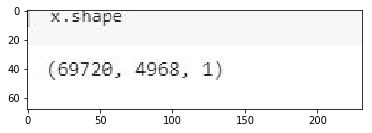

In [425]:
plt.imshow(image)
image.shape